# US Accidents Data Cleaning and Preparation

This notebook focuses on cleaning and preparing the US Accidents dataset for analysis. We'll perform the following steps:
1. Data Loading
2. Initial Data Inspection
3. Handling Missing Values
4. Data Type Conversions
5. Feature Engineering
6. Data Validation
7. Saving Cleaned Dataset

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
#plt.style.use('seaborn')
sns.set_palette('husl')

## 1. Data Loading

Load the raw dataset from the data/raw directory.

In [18]:
# Load the dataset
df = pd.read_csv('../data/raw/US_Accidents_Dec21_updated.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (2845342, 47)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperatur

In [19]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


## 2. Initial Data Inspection

Examine the data for quality issues and understanding the structure.

First few rows of the dataset:


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day



Basic Statistics:


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01



Missing Values Analysis:


,Missing Values,Percentage
Number,1743911,61.290031
Precipitation(in),549458,19.310789
Wind_Chill(F),469643,16.505678
Wind_Speed(mph),157944,5.550967
Wind_Direction,73775,2.592834
Humidity(%),73092,2.568830
Weather_Condition,70636,2.482514
Visibility(mi),70546,2.479350
Temperature(F),69274,2.434646
Pressure(in),59200,2.080593


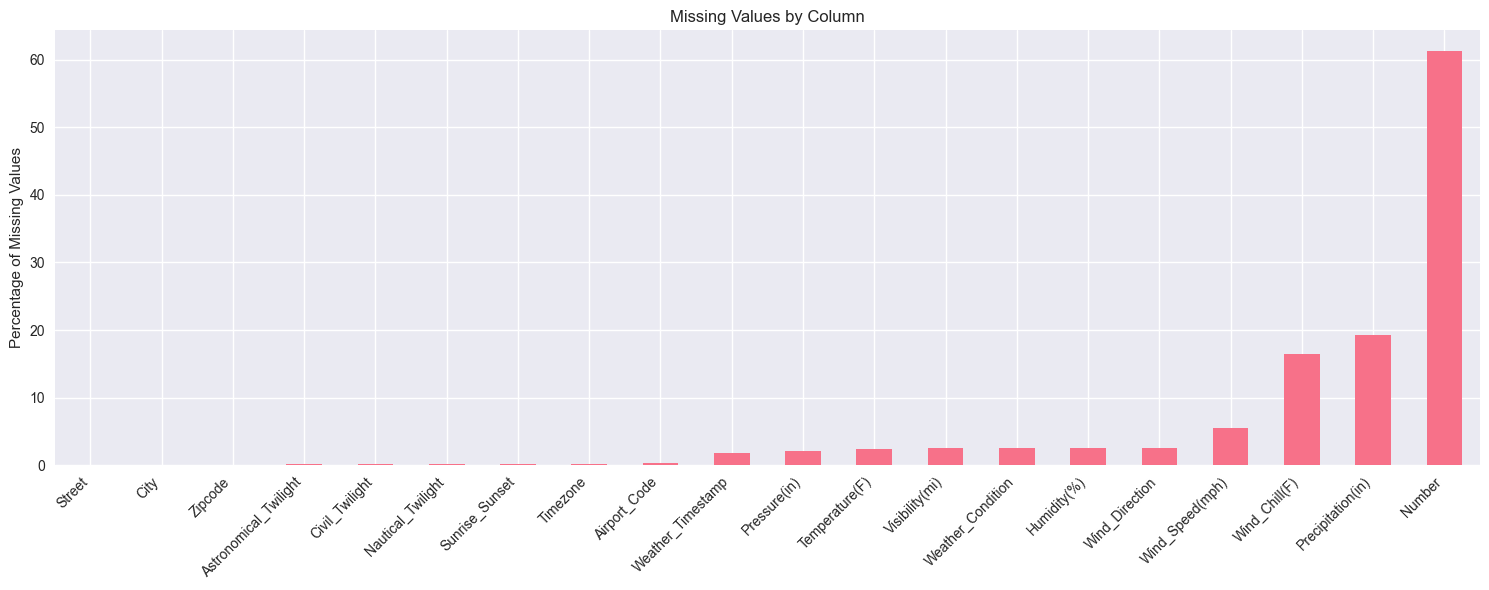

In [20]:
# Display first few rows
print("First few rows of the dataset:")
display(df.head())

# Basic statistics
print("\nBasic Statistics:")
display(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

print("\nMissing Values Analysis:")
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))

# Visualize missing values
plt.figure(figsize=(15, 6))
plt.title('Missing Values by Column')
missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage')['Percentage'].plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

## 3. Handling Missing Values

Strategy for handling missing values:
1. Drop columns with too many missing values (e.g., >50%)
2. Impute missing values where appropriate
3. Document all decisions

In [21]:
def handle_missing_values(df):
    """Handle missing values in the dataset.
    
    Args:
        df (pandas.DataFrame): Input dataframe
        
    Returns:
        pandas.DataFrame: Cleaned dataframe
    """
    # Make a copy of the dataframe
    df_clean = df.copy()
    
    # Drop columns with more than 50% missing values
    threshold = len(df_clean) * 0.5
    columns_to_drop = [col for col in df_clean.columns 
                      if df_clean[col].isnull().sum() > threshold]
    
    if columns_to_drop:
        print(f"Dropping columns with >50% missing values: {columns_to_drop}")
        df_clean = df_clean.drop(columns=columns_to_drop)
    
    # Handle missing values for specific columns
    # Fill numeric columns with median
    numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if df_clean[col].isnull().sum() > 0:
            print(f"Filling missing values in {col} with median")
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # Fill categorical columns with mode
    categorical_columns = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df_clean[col].isnull().sum() > 0:
            print(f"Filling missing values in {col} with mode")
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    
    return df_clean

# Apply missing value handling
df_clean = handle_missing_values(df)

# Compare shapes
print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")

# Verify no missing values remain
remaining_missing = df_clean.isnull().sum().sum()
print(f"\nRemaining missing values: {remaining_missing}")

Dropping columns with >50% missing values: ['Number']
Filling missing values in Temperature(F) with median
Filling missing values in Wind_Chill(F) with median
Filling missing values in Humidity(%) with median
Filling missing values in Pressure(in) with median
Filling missing values in Visibility(mi) with median
Filling missing values in Wind_Speed(mph) with median
Filling missing values in Precipitation(in) with median
Filling missing values in Street with mode
Filling missing values in City with mode
Filling missing values in Zipcode with mode
Filling missing values in Timezone with mode
Filling missing values in Airport_Code with mode
Filling missing values in Weather_Timestamp with mode
Filling missing values in Wind_Direction with mode
Filling missing values in Weather_Condition with mode
Filling missing values in Sunrise_Sunset with mode
Filling missing values in Civil_Twilight with mode
Filling missing values in Nautical_Twilight with mode
Filling missing values in Astronomical_T

## 4. Data Type Conversions

Convert columns to appropriate data types and handle datetime fields.


In [14]:
# Convert datetime columns
datetime_columns = ['Start_Time', 'End_Time']
for col in datetime_columns:
    df_clean[col] = pd.to_datetime(df_clean[col])

# Convert categorical columns
categorical_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 
                      'Astronomical_Twilight', 'Weather_Condition']
for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

# Display updated data types
print("Updated data types:")
for col in df_clean.columns:
    print(f"{col}: {df_clean[col].dtype}")

Updated data types:
ID: object
Severity: int64
Start_Time: datetime64[ns]
End_Time: datetime64[ns]
Start_Lat: float64
Start_Lng: float64
End_Lat: float64
End_Lng: float64
Distance(mi): float64
Description: object
Street: object
Side: object
City: object
County: object
State: object
Zipcode: object
Country: object
Timezone: object
Airport_Code: object
Weather_Timestamp: object
Temperature(F): float64
Wind_Chill(F): float64
Humidity(%): float64
Pressure(in): float64
Visibility(mi): float64
Wind_Direction: object
Wind_Speed(mph): float64
Precipitation(in): float64
Weather_Condition: category
Amenity: bool
Bump: bool
Crossing: bool
Give_Way: bool
Junction: bool
No_Exit: bool
Railway: bool
Roundabout: bool
Station: bool
Stop: bool
Traffic_Calming: bool
Traffic_Signal: bool
Turning_Loop: bool
Sunrise_Sunset: category
Civil_Twilight: category
Nautical_Twilight: category
Astronomical_Twilight: category


## 5. Feature Engineering

Create new features that might be useful for analysis.


Sample of new features:


,Duration,Hour,Day,Month,Year,DayOfWeek,IsWeekend,Season
0,6.0,0,8,2,2016,0,0,Winter
1,6.0,5,8,2,2016,0,0,Winter
2,6.0,6,8,2,2016,0,0,Winter
3,6.0,6,8,2,2016,0,0,Winter
4,6.0,7,8,2,2016,0,0,Winter


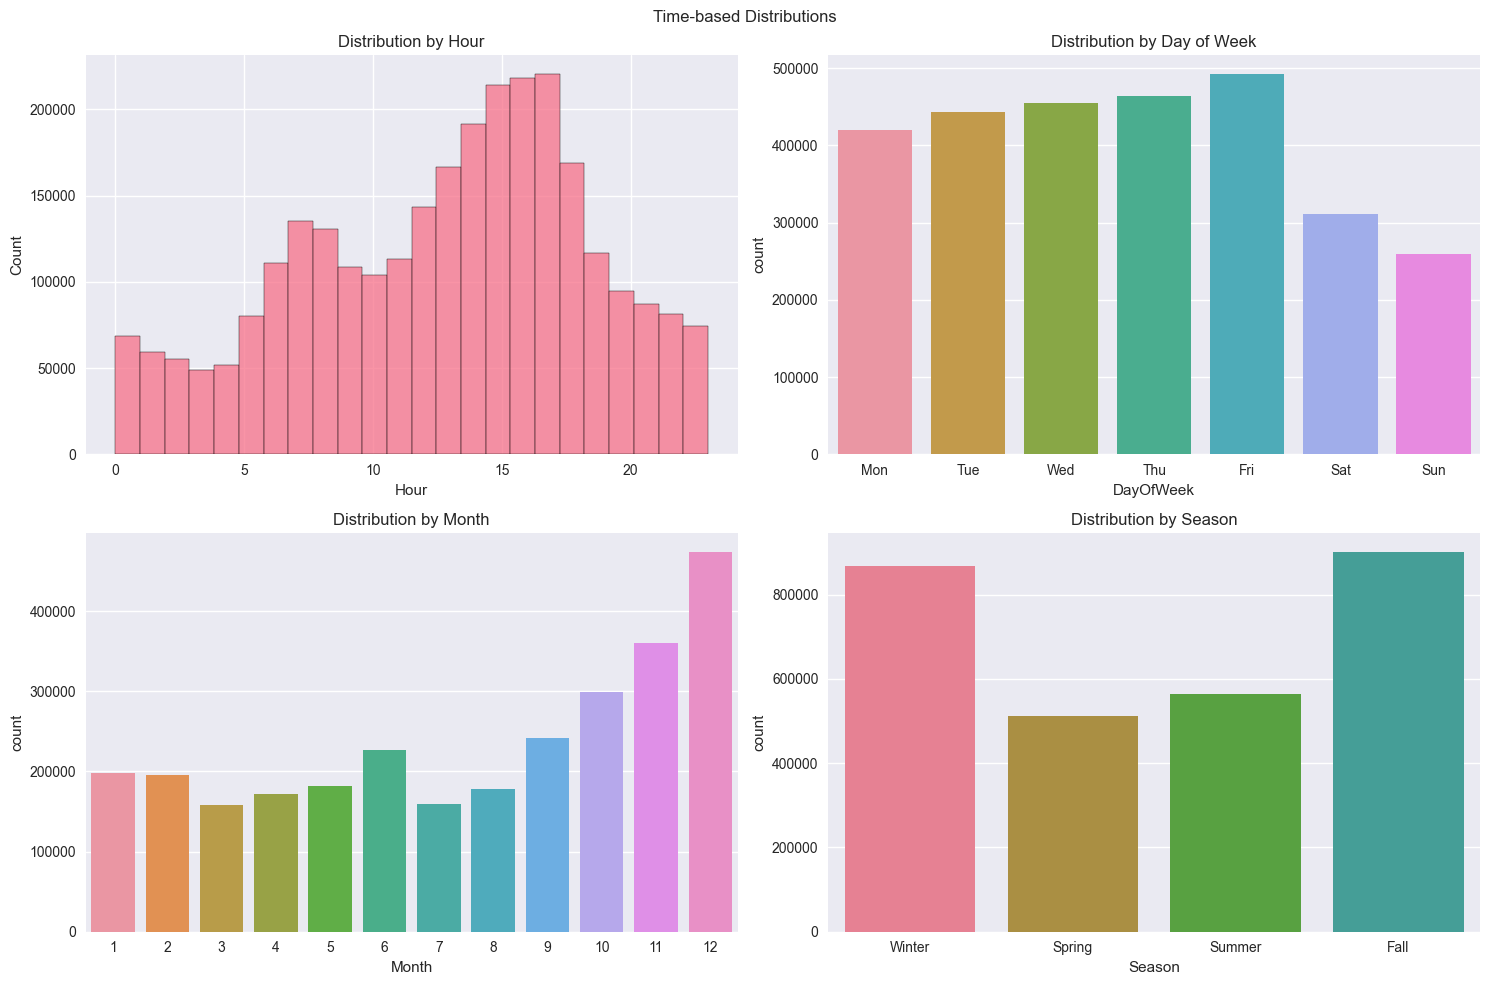

In [15]:
# Add duration column (in hours)
df_clean['Duration'] = (df_clean['End_Time'] - df_clean['Start_Time']).dt.total_seconds() / 3600

# Add time-based features
df_clean['Hour'] = df_clean['Start_Time'].dt.hour
df_clean['Day'] = df_clean['Start_Time'].dt.day
df_clean['Month'] = df_clean['Start_Time'].dt.month
df_clean['Year'] = df_clean['Start_Time'].dt.year
df_clean['DayOfWeek'] = df_clean['Start_Time'].dt.dayofweek
df_clean['IsWeekend'] = df_clean['DayOfWeek'].isin([5, 6]).astype(int)

# Add season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_clean['Season'] = df_clean['Month'].apply(get_season)

# Display new features
print("Sample of new features:")
display(df_clean[['Duration', 'Hour', 'Day', 'Month', 'Year', 'DayOfWeek', 'IsWeekend', 'Season']].head())

# Visualize time-based distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time-based Distributions')

# Hour distribution
sns.histplot(data=df_clean, x='Hour', bins=24, ax=axes[0,0])
axes[0,0].set_title('Distribution by Hour')

# Day of week distribution
sns.countplot(data=df_clean, x='DayOfWeek', ax=axes[0,1])
axes[0,1].set_title('Distribution by Day of Week')
axes[0,1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Month distribution
sns.countplot(data=df_clean, x='Month', ax=axes[1,0])
axes[1,0].set_title('Distribution by Month')

# Season distribution
sns.countplot(data=df_clean, x='Season', ax=axes[1,1])
axes[1,1].set_title('Distribution by Season')

plt.tight_layout()
plt.show()

## 6. Data Validation

Perform validation checks on the cleaned dataset to ensure data quality and consistency.

Validation Results:

missing_values: 0
invalid_dates: 0
future_dates: 0
end_before_start: 0
invalid_coords: 0
negative_durations: 0
excessive_durations: 4006
invalid_severity: 0
duplicate_records: 0

Detailed Investigation of Issues:


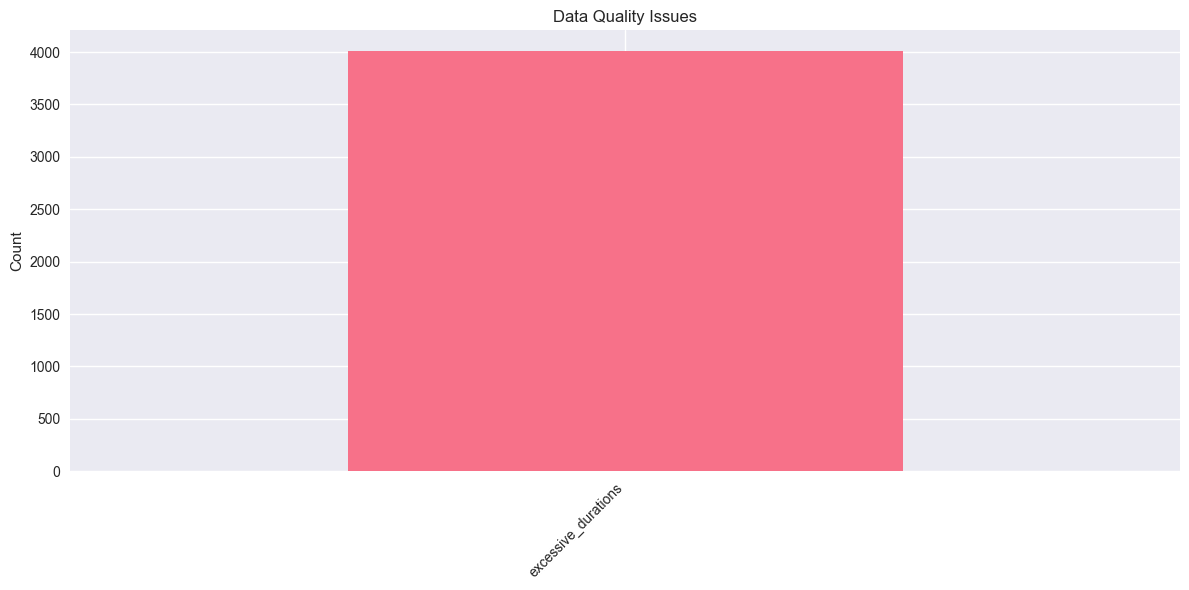

In [16]:
def validate_data(df):
    """Perform comprehensive validation checks on the dataset.
    
    Args:
        df (pandas.DataFrame): Input dataframe
        
    Returns:
        dict: Validation results
    """
    results = {}
    
    # 1. Check for remaining missing values
    results['missing_values'] = df.isnull().sum().sum()
    
    # 2. Check for invalid dates
    results['invalid_dates'] = df['Start_Time'].isnull().sum()
    results['future_dates'] = df[df['Start_Time'] > pd.Timestamp.now()].shape[0]
    results['end_before_start'] = df[df['End_Time'] < df['Start_Time']].shape[0]
    
    # 3. Check for invalid coordinates
    results['invalid_coords'] = df[
        (df['Start_Lat'].isnull()) | 
        (df['Start_Lng'].isnull()) |
        (df['Start_Lat'] < -90) | (df['Start_Lat'] > 90) |
        (df['Start_Lng'] < -180) | (df['Start_Lng'] > 180)
    ].shape[0]
    
    # 4. Check for invalid durations
    results['negative_durations'] = df[df['Duration'] < 0].shape[0]
    results['excessive_durations'] = df[df['Duration'] > 72].shape[0]  # Flag durations > 72 hours
    
    # 5. Check value ranges
    results['invalid_severity'] = df[~df['Severity'].between(1, 4)].shape[0]
    
    # 6. Check for duplicates
    results['duplicate_records'] = df.duplicated().sum()
    
    return results

# Run validation
validation_results = validate_data(df_clean)

# Display results with explanations
print("Validation Results:\n")
for check, count in validation_results.items():
    print(f"{check}: {count}")

# If there are any validation issues, investigate them
if any(validation_results.values()):
    print("\nDetailed Investigation of Issues:")
    
    # Investigate negative durations
    if validation_results['negative_durations'] > 0:
        print("\nSample of records with negative durations:")
        display(df_clean[df_clean['Duration'] < 0][
            ['Start_Time', 'End_Time', 'Duration']
        ].head())
    
    # Investigate invalid coordinates
    if validation_results['invalid_coords'] > 0:
        print("\nSample of records with invalid coordinates:")
        display(df_clean[
            (df_clean['Start_Lat'].isnull()) | 
            (df_clean['Start_Lng'].isnull()) |
            (df_clean['Start_Lat'] < -90) | (df_clean['Start_Lat'] > 90) |
            (df_clean['Start_Lng'] < -180) | (df_clean['Start_Lng'] > 180)
        ][['Start_Lat', 'Start_Lng']].head())
    
    # Investigate duplicate records
    if validation_results['duplicate_records'] > 0:
        print("\nSample of duplicate records:")
        display(df_clean[df_clean.duplicated(keep='first')].head())

# Visualize data quality metrics
quality_metrics = pd.Series(validation_results)
plt.figure(figsize=(12, 6))
quality_metrics[quality_metrics > 0].plot(kind='bar')
plt.title('Data Quality Issues')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 7. Save Cleaned Dataset

Save the cleaned and validated dataset to the processed data directory with proper documentation.

In [ ]:
# Create a data quality report
quality_report = pd.DataFrame({
    'Original_Type': df.dtypes,
    'Cleaned_Type': df_clean.dtypes,
    'Original_Missing': df.isnull().sum(),
    'Cleaned_Missing': df_clean.isnull().sum(),
    'Unique_Values': df_clean.nunique()
})

# Save the quality report
quality_report.to_csv('../data/processed/data_quality_report.csv')
print("Data Quality Report:")
display(quality_report)

# Save the cleaned dataset
output_path = '../data/processed/cleaned_accidents.csv'
df_clean.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to {output_path}")

# Display final dataset information
print("\nFinal Dataset Summary:")
print(f"Number of rows: {len(df_clean)}")
print(f"Number of columns: {len(df_clean.columns)}")
print("\nMemory usage:", df_clean.memory_usage().sum() / 1024**2, "MB")

# Display column information
print("\nColumns in cleaned dataset:")
for col in df_clean.columns:
    print(f"- {col}")
    print(f"  Type: {df_clean[col].dtype}")
    print(f"  Non-null count: {df_clean[col].count()}")
    print(f"  Memory usage: {df_clean[col].memory_usage() / 1024**2:.2f} MB")
    if df_clean[col].dtype in ['object', 'category']:
        print(f"  Unique values: {df_clean[col].nunique()}")
    print()

# Create a data dictionary
data_dictionary = {
    'Column': df_clean.columns,
    'Type': df_clean.dtypes,
    'Description': [
        'Unique identifier for each accident',
        'Accident severity rating (1-4)',
        'Start time of the accident',
        'End time of the accident',
        'Latitude of the accident location',
        'Longitude of the accident location',
        'Distance of the accident (miles)',
        'Accident description',
        'Weather condition during accident',
        'Time of day (Day/Night)',
        'Duration of the accident (hours)',
        'Hour of the day (0-23)',
        'Day of the month',
        'Month of the year',
        'Year of the accident',
        'Day of the week (0-6)',
        'Whether accident occurred on weekend',
        'Season of the year'
    ]
}

# Save data dictionary
data_dict_df = pd.DataFrame(data_dictionary)
data_dict_df.to_csv('../data/processed/data_dictionary.csv', index=False)
print("Data dictionary saved to ../data/processed/data_dictionary.csv")

Data Quality Report:


,Original_Type,Cleaned_Type,Original_Missing,Cleaned_Missing,Unique_Values
Airport_Code,object,object,9549,0.0,2004.0
Amenity,bool,bool,0,0.0,2.0
Astronomical_Twilight,object,object,2867,0.0,2.0
Bump,bool,bool,0,0.0,2.0
City,object,object,137,0.0,11681.0
Civil_Twilight,object,object,2867,0.0,2.0
Country,object,object,0,0.0,1.0
County,object,object,0,0.0,1707.0
Crossing,bool,bool,0,0.0,2.0
Description,object,object,0,0.0,1174563.0



Cleaned dataset saved to ../data/processed/cleaned_accidents.csv

Final Dataset Summary:
Number of rows: 2845342
Number of columns: 46

Memory usage: 751.6478176116943 MB

Columns in cleaned dataset:
- ID
  Type: object
  Non-null count: 2845342
  Memory usage: 21.71 MB
  Unique values: 2845342

- Severity
  Type: int64
  Non-null count: 2845342
  Memory usage: 21.71 MB

- Start_Time
  Type: object
  Non-null count: 2845342
  Memory usage: 21.71 MB
  Unique values: 1959333

- End_Time
  Type: object
  Non-null count: 2845342
  Memory usage: 21.71 MB
  Unique values: 2351505

- Start_Lat
  Type: float64
  Non-null count: 2845342
  Memory usage: 21.71 MB

- Start_Lng
  Type: float64
  Non-null count: 2845342
  Memory usage: 21.71 MB

- End_Lat
  Type: float64
  Non-null count: 2845342
  Memory usage: 21.71 MB

- End_Lng
  Type: float64
  Non-null count: 2845342
  Memory usage: 21.71 MB

- Distance(mi)
  Type: float64
  Non-null count: 2845342
  Memory usage: 21.71 MB

- Description
  Ty